# Lab 5 Loshak Viktor IP-11
## Task:
1. Analyze the data, prepare it for building a regression model
2. Divide the data into training and test samples
3. Build several regression models to predict wine quality (12 - quality). Use linear univariate and multivariate regression and polynomial regression of your choice (3-5 models)
4. Using a test sample, find out which model is better

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import r2_score

1. Let's start with visualizing some aspects of data and checking it for anomalies.

In [7]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()
# There are no null entries in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


To better understand relationships in the data let's scatter plot all pairs of parameters

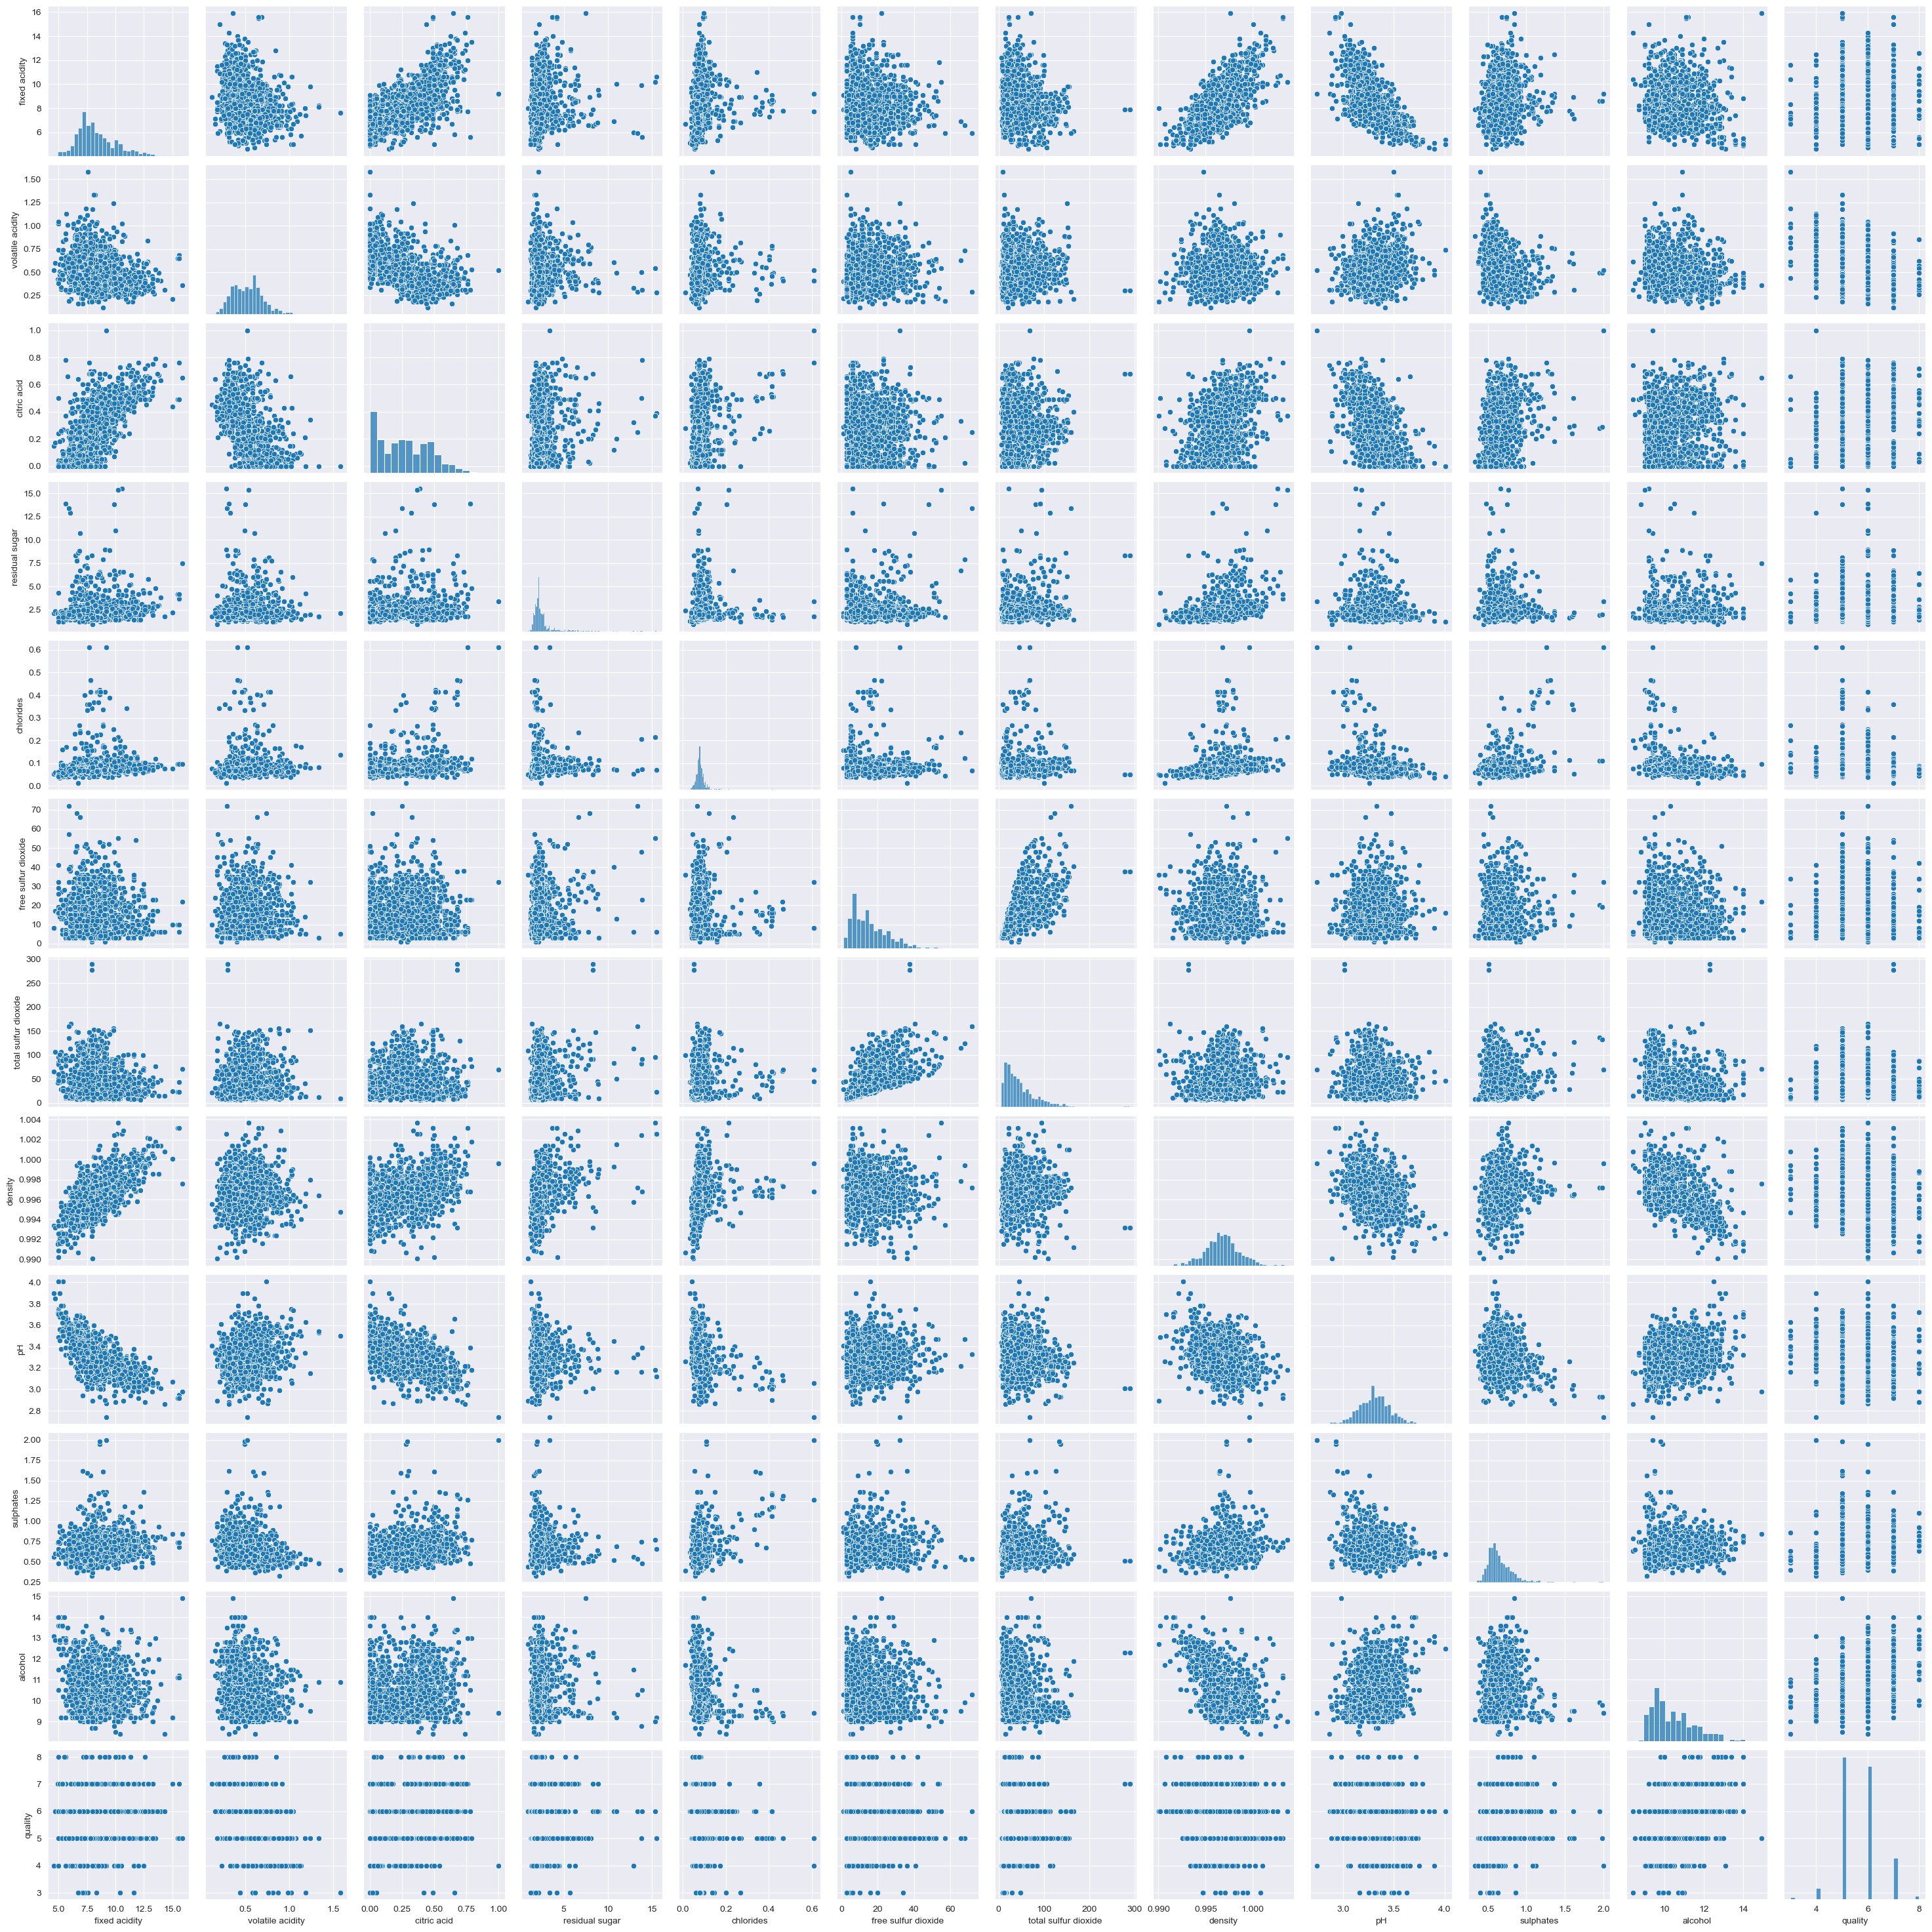

In [9]:
sns.pairplot(df)
plt.show()

From the plots above we can conclude that some of the parameters in data most probably have a normal distribution and there are some pretty strong correlations between parameters. Let's display heatmap for correlation to strengthen our assumptions.

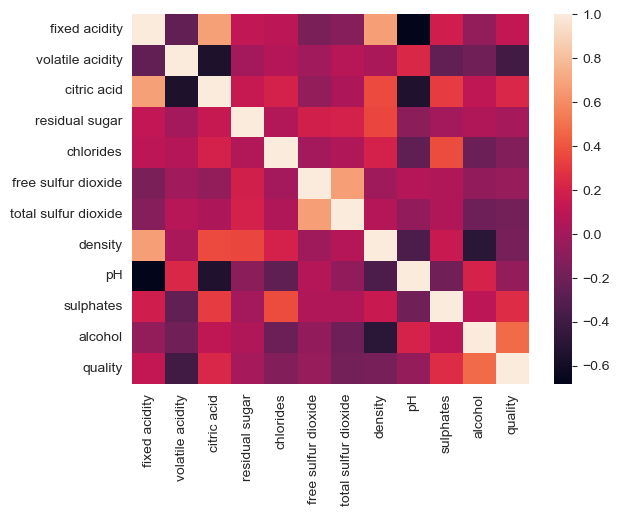

In [10]:
sns.heatmap(df.corr())
plt.show()

2. Let's divide the data into training and testing samples. The amount of test dataset is picked as 20 percent of the dataframe which corresponds to about 300 entries.

In [11]:
# Separating input variables and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- As a parameter for univariate linear regression the alcohol level was picked because from the heatmap it is visible that it has visible positive correlation with quality of the wine( it is possible to use volatile acidity as an input instead because it has negative correlation with the output)

R-squared score (linear univariate regression): 0.23561797203963386


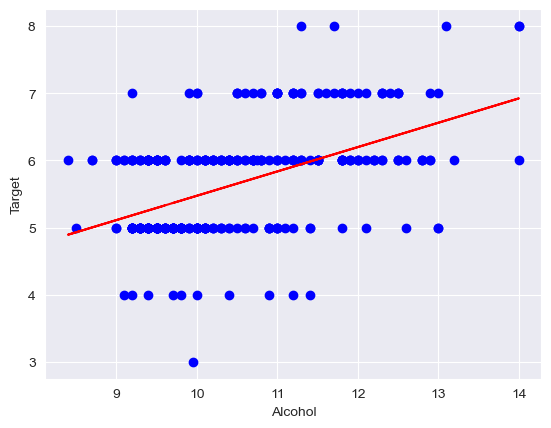

In [12]:
# Linear univariate regression
lr_univariate = LinearRegression()
lr_univariate.fit(X_train['alcohol'].values.reshape(-1, 1), y_train)
y_pred_lr_univariate = lr_univariate.predict(X_test['alcohol'].values.reshape(-1, 1))
r2_score_lr_univariate = r2_score(y_test, y_pred_lr_univariate)
print('R-squared score (linear univariate regression):', r2_score_lr_univariate)

# Plot the regression line according to the data
plt.scatter(X_test['alcohol'], y_test, color='blue')
plt.plot(X_test['alcohol'], y_pred_lr_univariate, color='red')
plt.xlabel('Alcohol')
plt.ylabel('Target')
plt.show()

- In multivariate regression I used ordinary multivariate regression with no modification, trained on all parameters of training dataset.

In [13]:
# Linear multivariate regression
lr_multivariate = LinearRegression()
lr_multivariate.fit(X_train, y_train)
y_pred_lr_multivariate = lr_multivariate.predict(X_test)
r2_score_lr_multivariate = r2_score(y_test, y_pred_lr_multivariate)

print('R-squared score (linear multivariate regression):', r2_score_lr_multivariate)

R-squared score (linear multivariate regression): 0.4031803412796229


- For polynomial regression we use the polynomial of degree 2 which may not be the most optimal choice for the given dataset but suits the purposes of exploring different methods of regression.

In [14]:
# Polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train[['volatile acidity', 'alcohol']])
X_test_poly = poly_reg.transform(X_test[['volatile acidity', 'alcohol']])

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
r2_score_poly = r2_score(y_test, y_pred_poly)

print('R-squared score (polynomial regression):', r2_score_poly)

R-squared score (polynomial regression): 0.3529143739270745


4. As can be inferred from the r-squared values for the models, the linear multivariate regression describes about 40 percent of the variance that is present in the data. This means that the Linear multivariate regression proves to be most effective in the given scenario.

## Additional Task:
Load the Data 4:
1. Analyze the data, determine if there is multicollinearity, and create scatter plots
2. Build several regression models (use linear regression and polynomial regression of your choice)
3. Using a test sample from the Data4t.csv file, find out which model is better

In [15]:
df = pd.read_csv('Data4.csv', encoding='cp1251', sep = ';')
clean_df=df.rename(columns= {'Unnamed: 0':'Country name ENG', 'UA': 'Country name UA'})
clean_df.head()

,Country name ENG,ISO,Country name UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,"0,97392353","0,605347614","0,538672856","0,510112666"
1,Algeria,DZA,Алжир,"0,782134498","0,58721932","0,348159396","0,497985576"
2,Angola,AGO,Ангола,"0,372343539","0,27439361","0,332117384","0,346906645"
3,Argentina,ARG,Аргентина,"0,883830062","0,699685109","0,28199471","0,518820368"
4,Armenia,ARM,Вірменія,"1,016498793","0,718326882","0,535647909","0,486498047"


In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country name ENG  132 non-null    object
 1   ISO               132 non-null    object
 2   Country name UA   132 non-null    object
 3   Cql               132 non-null    object
 4   Ie                132 non-null    object
 5   Iec               132 non-null    object
 6   Is                132 non-null    object
dtypes: object(7)
memory usage: 7.3+ KB


In [17]:
df[df.duplicated()]

,Unnamed: 0,ISO,UA,Cql,Ie,Iec,Is


In [18]:
clean_df['Cql'] = clean_df['Cql'].str.replace(',', '.').astype(float)
clean_df['Ie'] = clean_df['Ie'].str.replace(',','.').astype(float)
clean_df['Iec'] = clean_df['Iec'].str.replace(',','.').astype(float)
clean_df['Is'] = clean_df['Is'].str.replace(',','.').astype(float)
clean_df.dtypes

Country name ENG     object
ISO                  object
Country name UA      object
Cql                 float64
Ie                  float64
Iec                 float64
Is                  float64
dtype: object

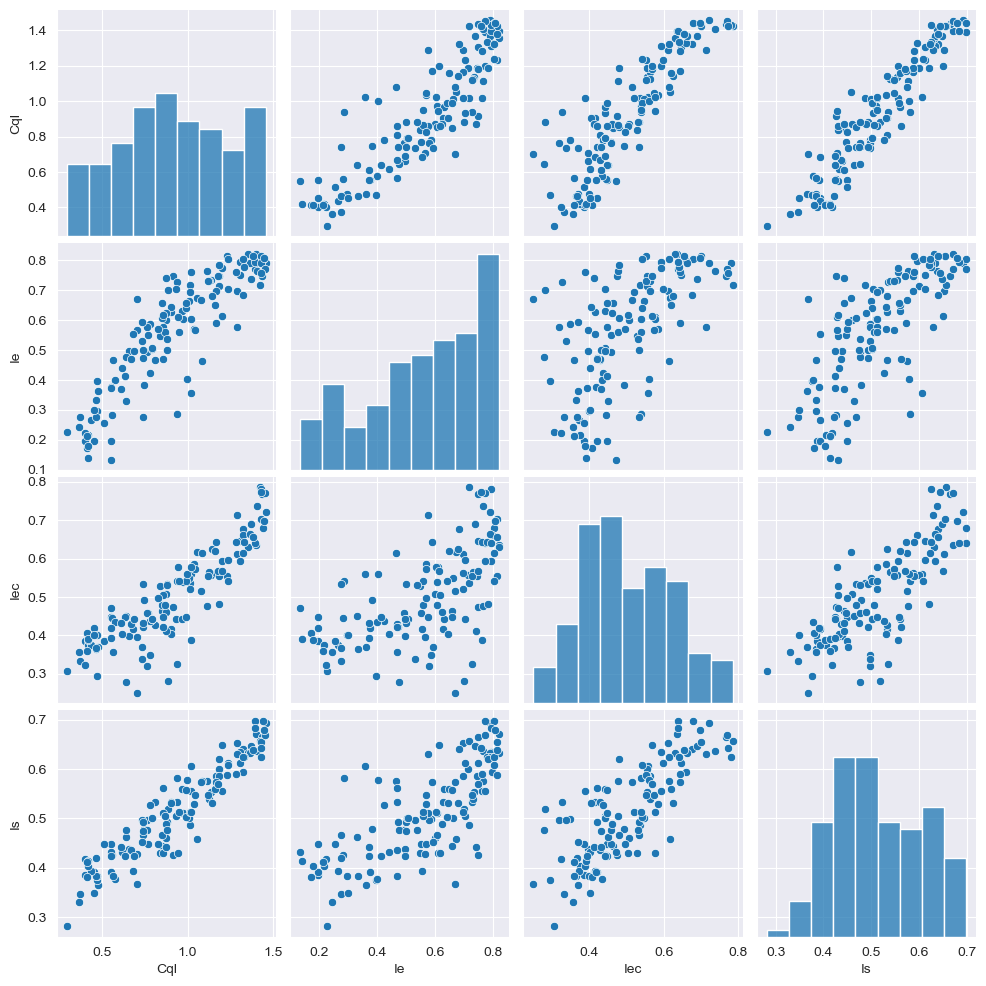

In [19]:
sns.pairplot(clean_df)
plt.show()

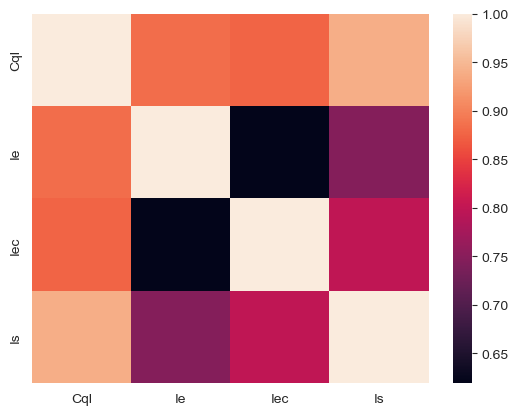

In [20]:
sns.heatmap(clean_df.corr())
plt.show()

1. From the scatterplots and heatmaps above it is visible that the data has multicolinearity as columns of the data are highly correlated with each other with some rare exception

2. Let's split the data into training and testing samples for the purposes of CQL prediction

In [21]:
# Separating input variables and target variable
X = clean_df.drop('Cql', axis=1)
y = clean_df['Cql']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Let's do univariate regression with Is as input to predict Cql

R-squared score (linear univariate regression): 0.780914026615592


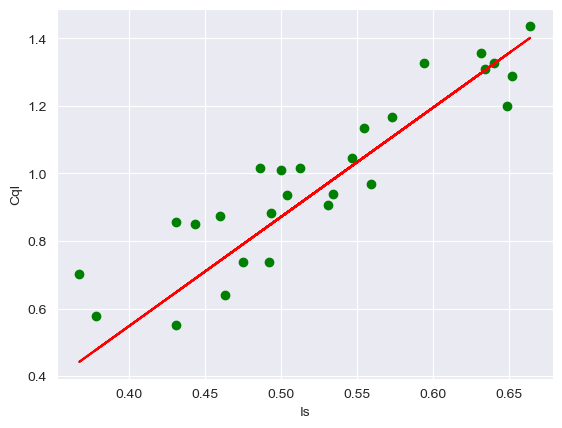

In [22]:
# Linear univariate regression
lr_univariate = LinearRegression()
lr_univariate.fit(X_train['Is'].values.reshape(-1, 1), y_train)
y_pred_lr_univariate = lr_univariate.predict(X_test['Is'].values.reshape(-1, 1))
r2_score_lr_univariate = r2_score(y_test, y_pred_lr_univariate)
print('R-squared score (linear univariate regression):', r2_score_lr_univariate)

# Plot the regression line according to the data
plt.scatter(X_test['Is'], y_test, color='green')
plt.plot(X_test['Is'], y_pred_lr_univariate, color='red')
plt.xlabel('Is')
plt.ylabel('Cql')
plt.show()

- Let's find optimal degree of polynomial regression for the given dataset without the change of the way we split dataset.

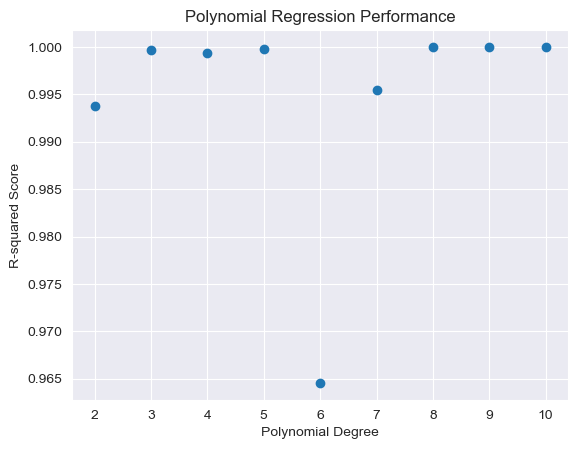

In [23]:
poly_degrees = range(2, 11) #from 2 up to 10 inclusive
r2_scores = []

for degree in poly_degrees:
    # Polynomial regression
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train[list(X_train.select_dtypes(include=['float']).columns)])
    X_test_poly = poly_reg.transform(X_test[list(X_test.select_dtypes(include=['float']).columns)])

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)

    r2_score_poly = r2_score(y_test, y_pred_poly)
    r2_scores.append(r2_score_poly)

plt.scatter(poly_degrees, r2_scores)
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared Score')
plt.title('Polynomial Regression Performance')
plt.show()

- Let's implement Lasso regression for the polynomial of optimal degree

R-squared score (lasso regression): 0.9996797081347509


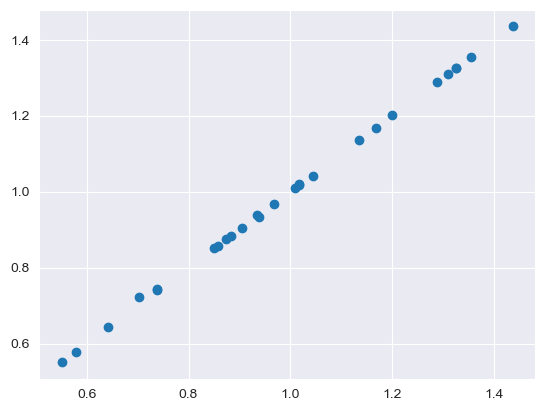

In [30]:
poly_regres = PolynomialFeatures(degree=3)
X_train_poly = poly_regres.fit_transform(X_train[list(X_train.select_dtypes(include=['float']).columns)])
X_test_poly = poly_regres.transform(X_test[list(X_test.select_dtypes(include=['float']).columns)])

poly_reg = LinearRegression()

poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)
r2_score_poly = r2_score(y_test, y_pred)
print('R-squared score (polynomial regression):', r2_score_poly )
plt.scatter(y_test, y_pred)
plt.show()